In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.drop(columns=["customerID"], inplace = True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
for col in df.columns:
    if col not in ["tenure", "MonthlyCharges", "TotalCharges"]:
        print(col, df[col].unique())
        print("------------------------------------------")

gender ['Female' 'Male']
------------------------------------------
SeniorCitizen [0 1]
------------------------------------------
Partner ['Yes' 'No']
------------------------------------------
Dependents ['No' 'Yes']
------------------------------------------
PhoneService ['No' 'Yes']
------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingMovies ['No' 'Yes' 'No int

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    print(col, ":", len(df[df[col] == " "]))
    print("---------------------------------------")

tenure : 0
---------------------------------------
MonthlyCharges : 0
---------------------------------------
TotalCharges : 11
---------------------------------------


In [17]:
df["TotalCharges"] = df["TotalCharges"].replace({" " : "0.0"}).astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


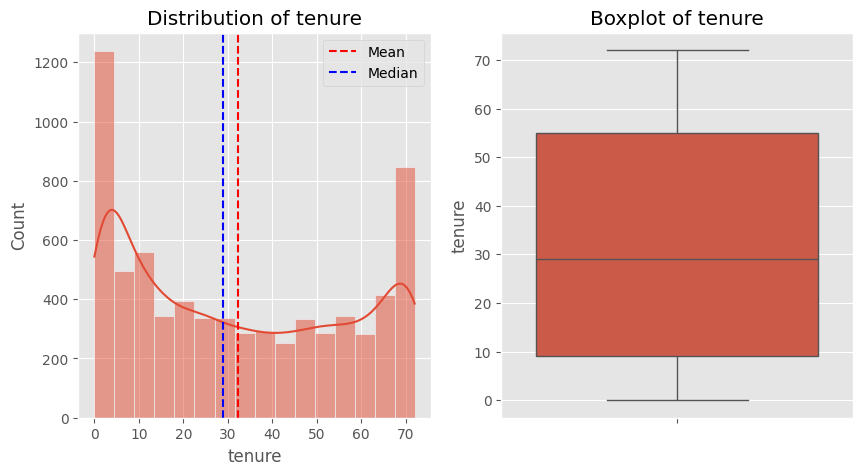

In [23]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="blue", linestyle="--", label="Median")
    plt.legend()MonthlyCharges
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

plot_distribution(df, "tenure")

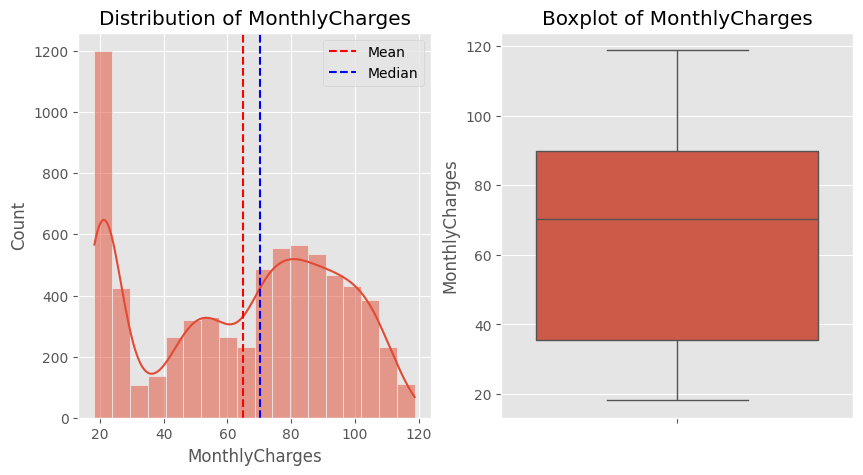

In [24]:
plot_distribution(df, "MonthlyCharges")

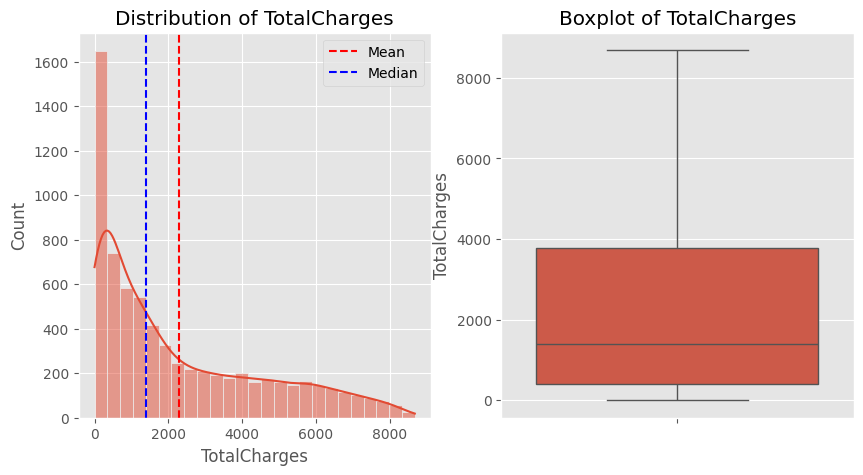

In [25]:
plot_distribution(df, "TotalCharges")

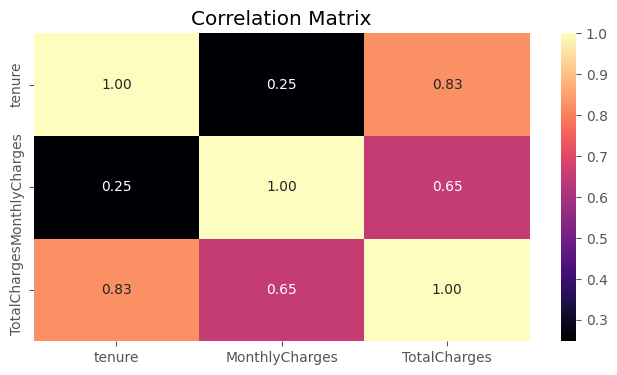

In [31]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

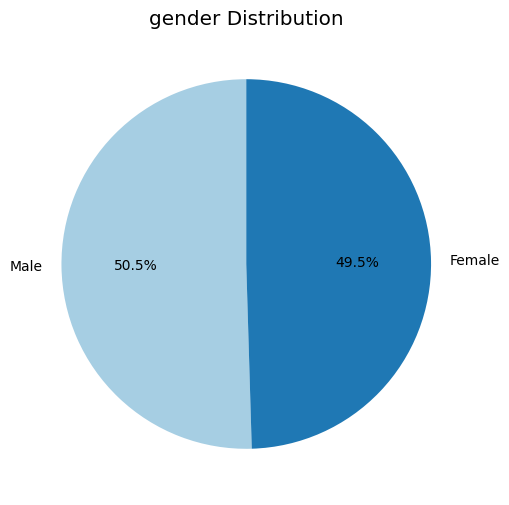

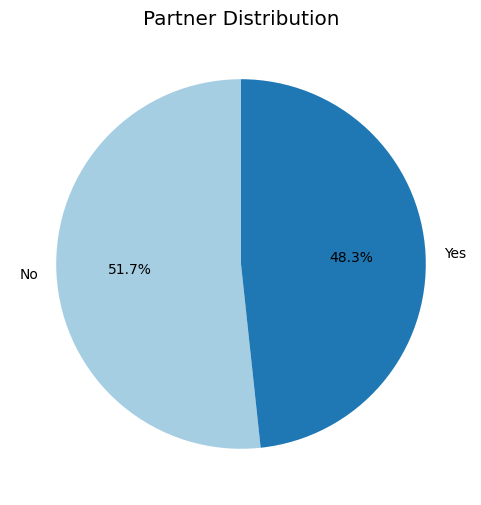

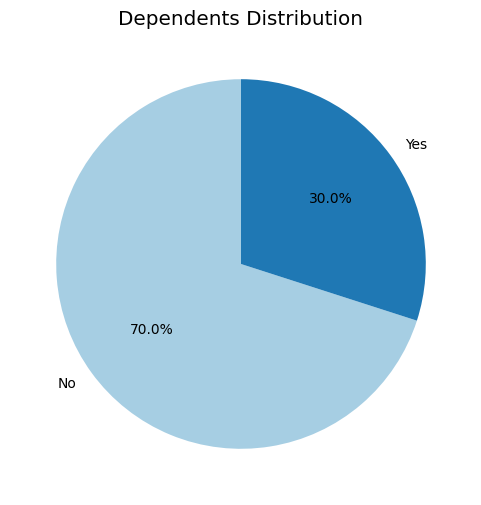

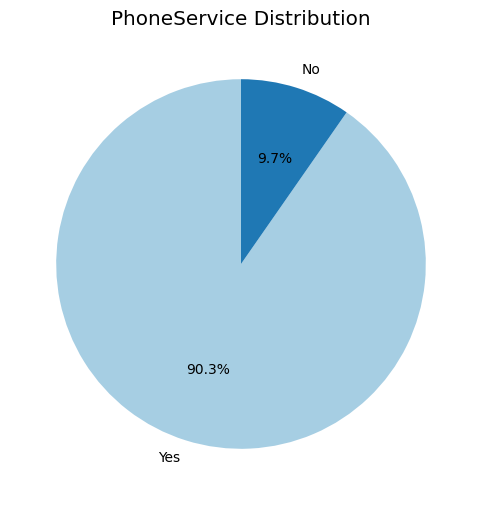

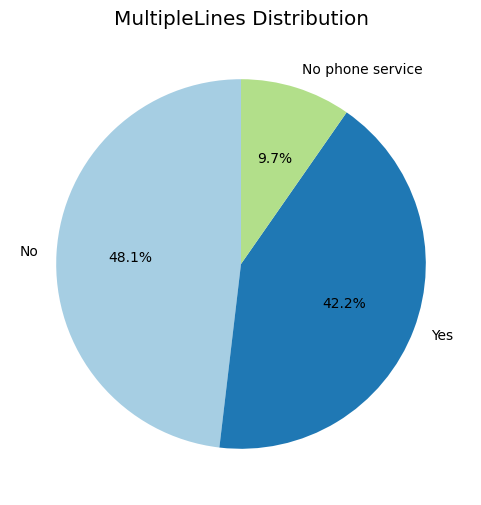

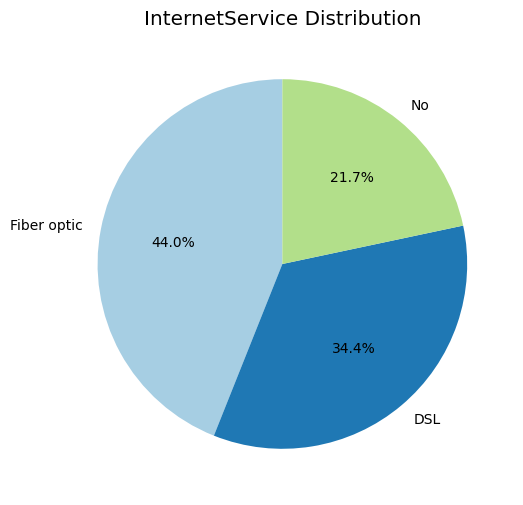

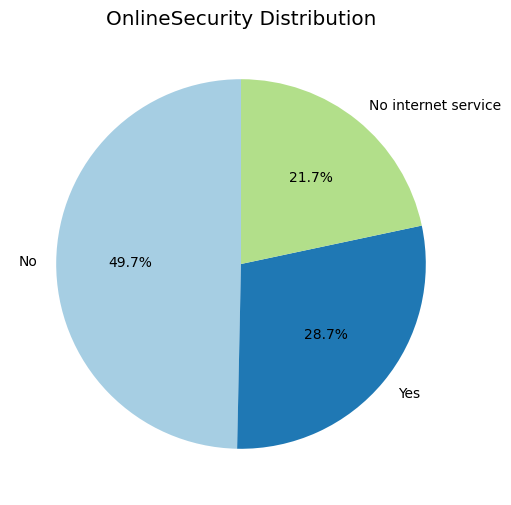

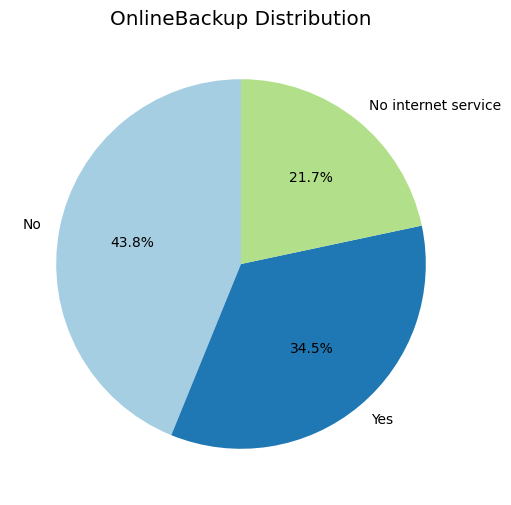

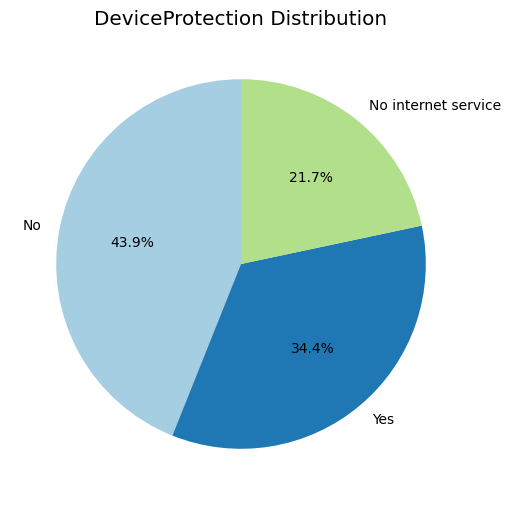

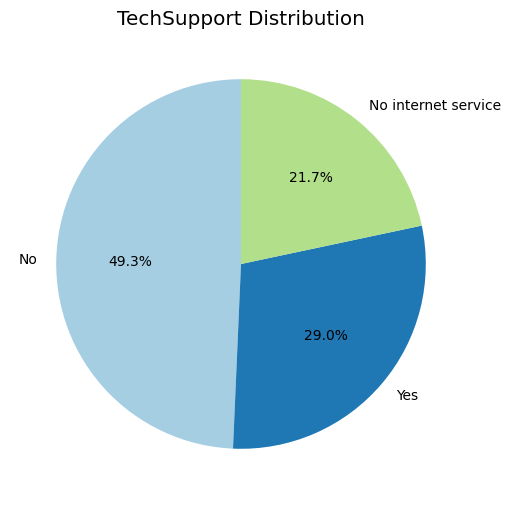

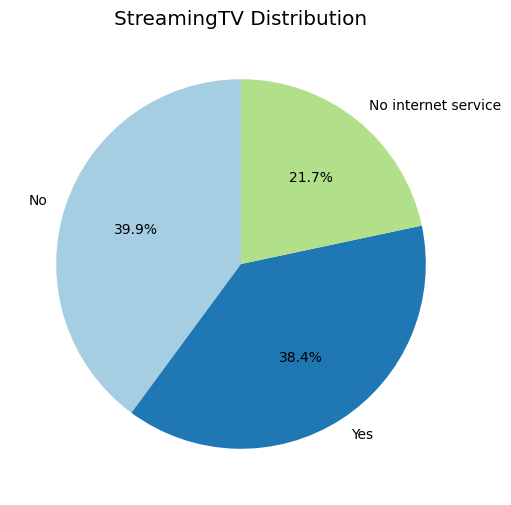

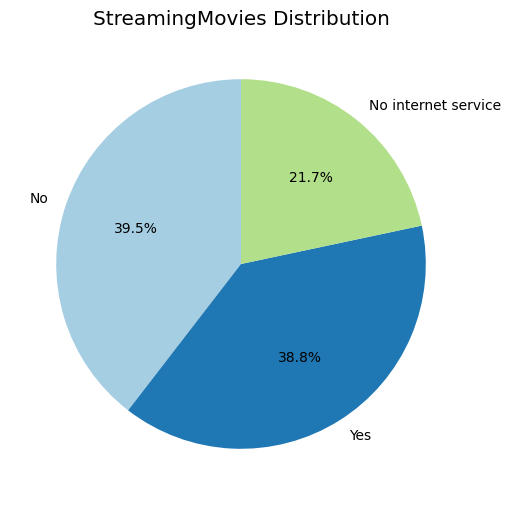

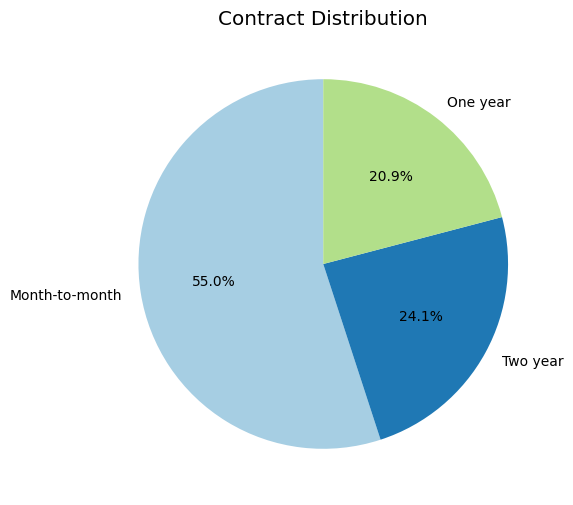

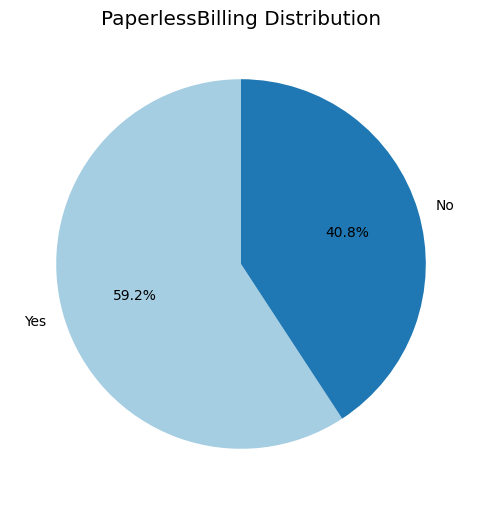

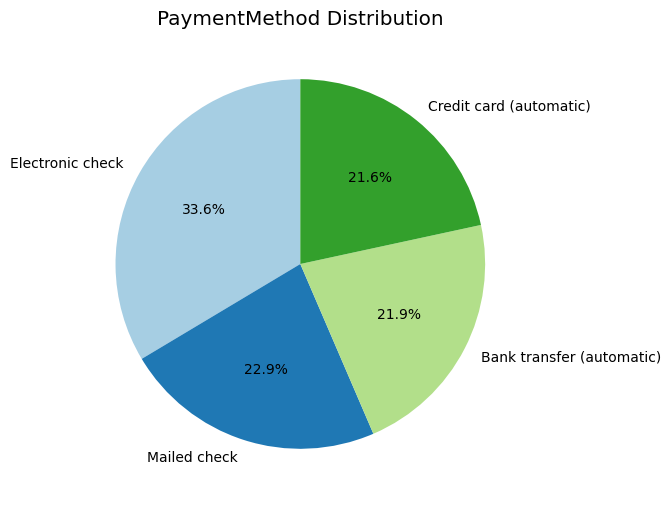

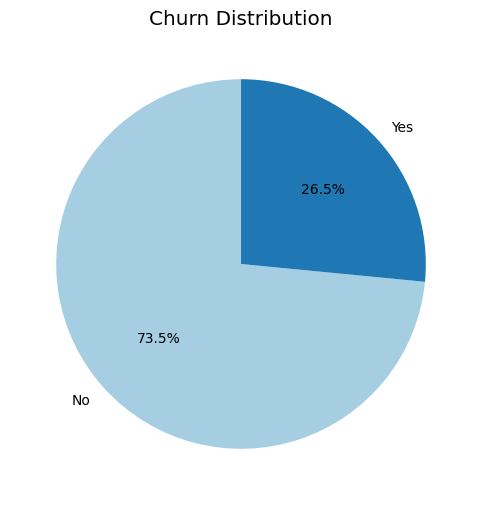

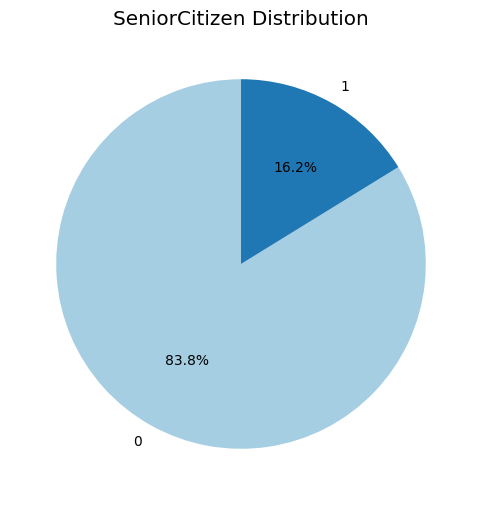

In [32]:
categorical_cols = df.select_dtypes(include="object").columns.to_list() + ['SeniorCitizen']
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts()
    labels = values.index 
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"{col} Distribution")
    plt.show()

In [33]:
df["Churn"] = df["Churn"].replace({"Yes" : 1, "No" : 0})

/tmp/ipykernel_9001/519925226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes" : 1, "No" : 0})


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
object_columns = df.select_dtypes(include="object").columns

In [36]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [37]:
len(object_columns)

15

In [42]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [43]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [44]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [47]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [50]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.127605
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.242606
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.852932
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.870513


In [51]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
smote = SMOTE(random_state=42)

In [54]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [55]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [57]:
y_pred = log_reg.predict(X_test)

In [58]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [59]:
print(accuracy_score(y_train_smote, log_reg.predict(X_train_smote)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.778153697438376
0.7494677075940384
[[744 292]
 [ 61 312]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [61]:
y_pred = knn.predict(X_test)

In [62]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [63]:
print(accuracy_score(y_train_smote, knn.predict(X_train_smote)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8635814403093282
0.7203690560681334
[[738 298]
 [ 96 277]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1036
           1       0.48      0.74      0.58       373

    accuracy                           0.72      1409
   macro avg       0.68      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



In [64]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train_smote, y_train_smote)
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [66]:
grid.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [67]:
grid.best_score_

0.7736868222484931

In [68]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],         
    'weights': ['uniform', 'distance'],     
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [70]:
grid.best_score_

0.8118686603324722

In [71]:
svc = SVC(probability = True)

parameters = {
    "gamma" : [0.0001, 0.001, 0.01, 0.1],
    "C" : [0.01, 0.05, 0.5, 0.1, 1, 10]
    
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [72]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [73]:
grid_search.best_score_

0.8183972590743904

In [74]:
svc = SVC(C=10, gamma= 0.1, probability=True)
svc.fit(X_train_smote, y_train_smote)

SVC(C=10, gamma=0.1, probability=True)

In [75]:
y_pred = svc.predict(X_test)

In [76]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [77]:
print(accuracy_score(y_train_smote, svc.predict(X_train_smote)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.889076848719188
0.7530163236337828
[[791 245]
 [103 270]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1036
           1       0.52      0.72      0.61       373

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [78]:
dtc = DecisionTreeClassifier()
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,32,1),
    "min_samples_leaf" : range(1, 10, 1),
    "min_samples_split" : range(2,10,1),
    "splitter" : ["best", "random"]
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [79]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [80]:
grid_search_dt.best_score_

0.7852871550126246

In [81]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [82]:
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [83]:
print(accuracy_score(y_train_smote, dtc.predict(X_train_smote)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8502899951667472
0.7359829666430092
[[779 257]
 [115 258]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1036
           1       0.50      0.69      0.58       373

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.74      0.75      1409



In [84]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [85]:
y_pred = rand_clf.predict(X_test)

In [86]:
print(accuracy_score(y_train_smote, rand_clf.predict(X_train_smote)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8833977767037217
0.7700496806245565
[[793 243]
 [ 81 292]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



In [87]:
gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train_smote, y_train_smote)

print(grid_search_gbc.best_params_)

best_gbc = grid_search_gbc.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


In [88]:
grid_search_gbc.best_score_

0.7854035766070566

In [89]:
y_pred_train = best_gbc.predict(X_train_smote)
y_pred_test = best_gbc.predict(X_test)

gbc_acc = accuracy_score(y_train_smote, y_pred_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7636621717530163
Confusion Matrix:
 [[780 256]
 [ 77 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.54      0.79      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.78      1409



In [90]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
print(accuracy_score(y_train_smote, xgb.predict(X_train_smote)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.805703238279362
0.7487579843860894
[[747 289]
 [ 65 308]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [92]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,82.24
4,Random Forest Classifier,77.00
2,SVM,75.30
0,Logistic Regression,74.95
6,XgBoost,74.88
3,Decision Tree Classifier,73.60
1,KNN,72.04


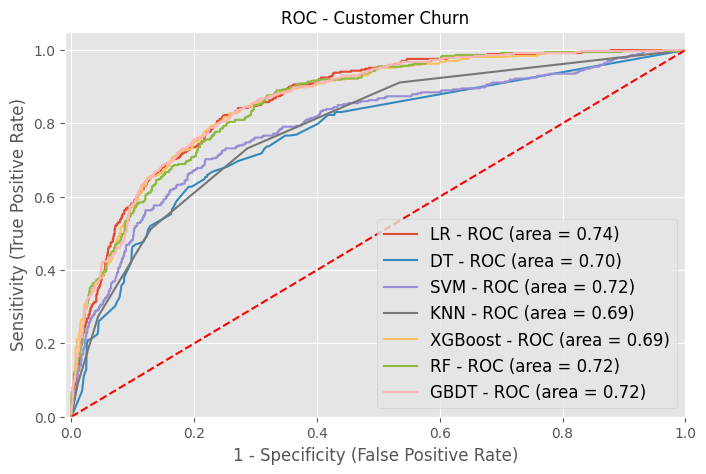

In [96]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Customer Churn', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_Customer Churn.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[74.95, 73.6, 75.3, 72.04, 74.88, 77.0, 82.24000000000001]
[74.17, 68.11, 71.98, 69.14, 68.91000000000001, 71.8, 72.09]


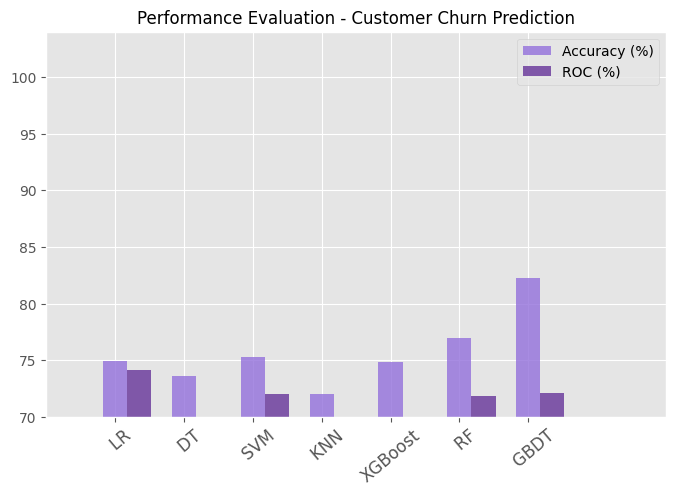

In [95]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Customer Churn Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("Customer Churn.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [110]:
report_dict = classification_report(y_test, y_pred, output_dict = True)

In [111]:
report_dict

{'0': {'precision': 0.8439461883408071,
  'recall': 0.9083011583011583,
  'f1-score': 0.8749418874941888,
  'support': 1036.0},
 '1': {'precision': 0.6768707482993197,
  'recall': 0.5335120643431636,
  'f1-score': 0.5967016491754122,
  'support': 373.0},
 'accuracy': 0.8090844570617459,
 'macro avg': {'precision': 0.7604084683200634,
  'recall': 0.7209066113221609,
  'f1-score': 0.7358217683348005,
  'support': 1409.0},
 'weighted avg': {'precision': 0.7997168489969642,
  'recall': 0.8090844570617459,
  'f1-score': 0.8012842516582033,
  'support': 1409.0}}

In [112]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [113]:
hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

In [114]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.82



In [136]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 7}

In [140]:
best_xgbc_model = grid.best_estimator_

In [141]:
best_xgbc_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
import pickle

In [117]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [118]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [119]:
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [120]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [121]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [122]:
y_test_prob

array([0.915, 0.29 , 0.005, ..., 0.015, 0.03 , 0.375])

In [123]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.7799858055358411
ROC - AUC Score :  0.7414382498162658
Confusion Matrix : 
 [[853 183]
 [127 246]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [124]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)

In [135]:
import mlflow
import mlflow.sklearn

In [137]:
report_dict

{'0': {'precision': 0.8439461883408071,
  'recall': 0.9083011583011583,
  'f1-score': 0.8749418874941888,
  'support': 1036.0},
 '1': {'precision': 0.6768707482993197,
  'recall': 0.5335120643431636,
  'f1-score': 0.5967016491754122,
  'support': 373.0},
 'accuracy': 0.8090844570617459,
 'macro avg': {'precision': 0.7604084683200634,
  'recall': 0.7209066113221609,
  'f1-score': 0.7358217683348005,
  'support': 1409.0},
 'weighted avg': {'precision': 0.7997168489969642,
  'recall': 0.8090844570617459,
  'f1-score': 0.8012842516582033,
  'support': 1409.0}}

In [143]:
mlflow.set_experiment("Churn1")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
with mlflow.start_run():
    mlflow.log_params(grid.best_params_)
    mlflow.log_metrics({
        "accuracy":report_dict['accuracy'], 
        "recall_class_0":report_dict['0']['recall'],
        "recall_class_1":report_dict['1']['recall'],
        "f1_score_macro":report_dict['macro avg']['f1-score']
    })
    
    mlflow.sklearn.log_model(best_xgbc_model, "XGBC Model Data")

2024/12/16 01:14:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run sedate-mare-22 at: http://127.0.0.1:5000/#/experiments/816180242453760679/runs/2a5e227484844ba99191478115e6132f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/816180242453760679


In [144]:
model_name = "XGBC Model Data"
run_id = "2a5e227484844ba99191478115e6132f"
model_uri = f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id = run_id):
    mlflow.register_model(model_uri=model_uri, name = model_name)

Successfully registered model 'XGBC Model Data'.
2024/12/16 01:22:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBC Model Data, version 1


🏃 View run sedate-mare-22 at: http://127.0.0.1:5000/#/experiments/816180242453760679/runs/2a5e227484844ba99191478115e6132f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/816180242453760679


Created version '1' of model 'XGBC Model Data'.


In [148]:
logged_model = 'runs:/2a5e227484844ba99191478115e6132f/XGBC Model Data'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)
loaded_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [149]:
logged_model

'runs:/2a5e227484844ba99191478115e6132f/XGBC Model Data'

In [150]:
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [151]:
current_model_uri = f"models:/{model_name}@ml"
production_model_name = 'CustomerChurn-Prediction-Production'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'CustomerChurn-Prediction-Production'.
Copied version '1' of model 'XGBC Model Data' to version '1' of model 'CustomerChurn-Prediction-Production'.


<ModelVersion: aliases=[], creation_timestamp=1734302362990, current_stage='None', description='', last_updated_timestamp=1734302362990, name='CustomerChurn-Prediction-Production', run_id='2a5e227484844ba99191478115e6132f', run_link='', source='models:/XGBC Model Data/1', status='READY', status_message='', tags={}, user_id='', version='1'>

In [152]:
model_version = 1
prod_model_uri = f'models:/{production_model_name}@churn'

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)

In [153]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])